In [1]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("heart.csv")
df.head(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
data_arr = df.values
X = data_arr[:,:-1]
y = data_arr[:,-1]
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [5]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

In [6]:
np.unique(y_train,return_counts=True)

(array([0., 1.]), array([109, 133], dtype=int64))

# Balanced Dataset

In [11]:
bal_arr = np.genfromtxt("heart_bal.csv",delimiter=",")
X_bal = bal_arr[:,:-1]
y_bal = bal_arr[:,-1]

In [12]:
X_train,X_test,y_train,y_test = train_test_split(X_bal,y_bal,test_size=0.2)

# Fitting and Testing

In [13]:
logreg = LogisticRegression(solver='saga',penalty='elasticnet',l1_ratio=0.5) ## By default, solver lbfgs
logreg.fit(X_train,y_train)

LogisticRegression(l1_ratio=0.5, penalty='elasticnet', solver='saga')

In [20]:
print(X_train.shape)

(264, 13)


In [14]:
y_pred = logreg.predict(X_test)

In [16]:
print(y_pred)
print(y_test)

[0. 0. 0. 0. 1. 0. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 0. 0. 1.
 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 1. 1. 0. 1. 0. 1. 0. 1. 1. 1. 0. 1. 0.
 0. 0. 0. 1. 1. 0. 0. 0. 1. 0. 1. 0. 1. 1. 1. 0. 0. 1.]
[0. 0. 0. 1. 1. 0. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 0. 0. 0.
 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 1. 1. 1. 0. 1. 0. 1. 0. 1. 1. 1. 0. 1. 1.
 0. 0. 0. 1. 0. 0. 0. 1. 1. 0. 1. 0. 1. 1. 1. 0. 0. 0.]


In [17]:
print(accuracy_score(y_test,y_pred))

0.8939393939393939


In [18]:
def acc_with_Threshold(threshArr,X_test,y_test,model):
    acc_ls = []
    for thresh in threshArr:
        preds = np.where(logreg.predict_proba(X_test)[:,1] > thresh, 1, 0)## if greater return 1 else 0
        acc = accuracy_score(y_test,preds)
        acc_ls.append(acc)
    acc_ls = np.array(acc_ls)
    idx = np.argmax(acc_ls)
    print(threshArr[idx],acc_ls[idx])
    fig = plt.figure()
    
    plt.xticks(threshArr)
    plt.plot(threshArr,acc_ls)
    fig.tight_layout()
    
    plt.show()

0.35 0.8939393939393939


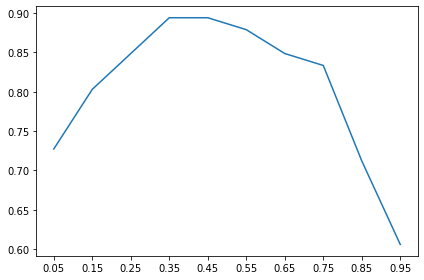

In [19]:
threshArr = np.linspace(0.05,0.95,10)
acc_with_Threshold(threshArr,X_test,y_test,logreg)

# Code for Balancing Data

In [35]:
from imblearn.over_sampling import SMOTE ## Install imblearn if not already installed

In [36]:
sme = SMOTE()
df = pd.read_csv("heart.csv")
arr = df.values
X = arr[:,:-1]
y = arr[:,-1]
X_bal,y_bal = sme.fit_resample(X,y)

In [37]:
print(X_bal.shape)

(330, 13)
